<a href="https://colab.research.google.com/github/DhanieArdiyan/ASE2306-Capstone-Project/blob/main/IOT_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Communication between Arduino and Python.
The following codes runs the program for the vending machine selection. It allows a two-way communication between Arduino and Python. Since Google Colab is an independent platform seperate from the OS, Spyder is used as the coding platform. 

In [ ]:
# import serial
# import time
# import gspread
# gc = gspread.service_account(filename='credentials.json')
# sh = gc.open_by_key('1q1yoNsM5ukwB6lJIfMFQTqSjVlyjaAzVs0nUG_NVPug')
# worksheet = sh.sheet1

# import gspread_dataframe as gd
# from datetime import datetime
# import pytz

# timezone = pytz.timezone ('Singapore')

# def current_time():
#     return datetime.now(timezone).strftime('%H:%M:%S')

# def appending_data(worksheet, input, user):
#     dataframe = gd.get_as_dataframe(worksheet)
    
#     data = {'Time': current_time(), 'Choice': input, 'Staff': user}
#     updated = dataframe.append(data, ignore_index=True)
#     gd.set_with_dataframe(worksheet, updated)
#     return dataframe


# ser = serial.Serial('COM4', 9600)
# fileName = "test_data.csv" #name of CSV file generated
# time.sleep (2)

# while 1:
#       if (ser.inWaiting()>0): #if there is data waiting at the serial port
#         myData = ser.readline()
#         myData_string=myData.decode("utf-8")
#         print (myData_string)
        
#         if myData_string[16:23] in ['Snack 1', 'Snack 2']: 
#             selection = myData_string[16:23]
            
            
#         if myData_string[0:5] == 'Hello': 
#             user = myData_string[6:].replace('!','')
            
            
#         if myData_string[0:5] == 'Enjoy':
#             appending_data(worksheet, selection, user)

# MACHINE LEARNING
### Importing the necessary libraries.
The approach used is Logistic Regression - Confusion Matrix.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

## Importing the snack count csv file.

There is a section in Spyder where the program captures the input from Arduino and stores it in a CSV file. This CSV file does not run in Microsoft Excel, but rather on gspread (something like google sheets).

This method allows real-time data updates and it is so much efficient than storing it into the conventional saving to a microsoft excel csv file. Why is this so?

Imagine being a software engineer that needs to come down to the remote vending machine, open the vending machine to access the CPU, export the csv file manually in person? It would be so troublesome. All these processes could easily be eliminated if the data is received digitally. The software engineer could be in Dubai and access the data while the vending machine is in SIAEC.


In [2]:
df = pd.read_csv('Snack count - Sheet1.csv', header=0)
df

,Time,Choice,Staff
0,17:18:21,Snack 2,Dhanie
1,17:18:53,Snack 1,Dhanie
2,17:20:36,Snack 1,Jay
3,17:25:13,Snack 1,Dhanie
4,17:25:47,Snack 2,Jay
5,17:28:42,Snack 2,Dhanie
6,17:29:01,Snack 1,Jay
7,17:36:08,Snack 1,Dhanie
8,17:36:28,Snack 1,Jay
9,17:38:28,Snack 1,Dhanie


### Plotting the no. of snacks consumed by each staff.

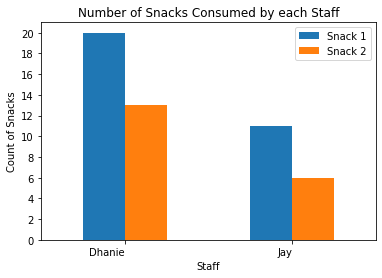

In [3]:
df["Staff"].replace("\n", "", regex = True, inplace = True) 

group_by_staff = df.groupby(["Staff", "Choice"]).count().unstack() 
group_by_staff.columns = ["Snack 1", "Snack 2"]  
   
group_by_staff.plot(kind = "bar")       
plt.xticks(rotation=360, ha='right')    
plt.ylabel("Count of Snacks")           
plt.yticks(np.arange(0, group_by_staff.max().max() + 1, 2.0)) 
plt.title("Number of Snacks Consumed by each Staff")    
plt.show()

### Adding new columns to convert the Choice and Staff into an integer type.

In [4]:
df['Numbered choice'] = df['Choice']
df['Staff ID'] = df['Staff']

df['Numbered choice'] = df['Numbered choice'].replace(['Snack 1'],'0')
df['Numbered choice'] = df['Numbered choice'].replace(['Snack 2'],'1')

df['Staff ID'] = df['Staff ID'].replace(['Dhanie'],'123')
df['Staff ID'] = df['Staff ID'].replace(['Jay'],'1234')

df

,Time,Choice,Staff,Numbered choice,Staff ID
0,17:18:21,Snack 2,Dhanie,1,123
1,17:18:53,Snack 1,Dhanie,0,123
2,17:20:36,Snack 1,Jay,0,1234
3,17:25:13,Snack 1,Dhanie,0,123
4,17:25:47,Snack 2,Jay,1,1234
5,17:28:42,Snack 2,Dhanie,1,123
6,17:29:01,Snack 1,Jay,0,1234
7,17:36:08,Snack 1,Dhanie,0,123
8,17:36:28,Snack 1,Jay,0,1234
9,17:38:28,Snack 1,Dhanie,0,123


### Preparing the variables for machine learning.

In [6]:
X = df[['Staff ID']]
y = df['Numbered choice']

#LOGISTIC REGRESSION vs LINEAR REGRESSION
Why use a Logistic Regression instead of Linear Regression?
1. Logistic Regression outcome is discrete (0 and 1), unlike in the case of Linear Regression where the outcome is continuous.

2. Do not need a linear relationship.

3. Linear Regression is a regression algorithm for Machine Learning. Logistic Regression is a classification algorithm.

Hence, Logistic Regression is better suited to be used for this project. A confusion matrix is a classification model, and useful in model evaluation. It summarises the performance of a classification model in a table, that projects the no. of correct and incorrect predictions.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [8]:
logisticRegr = LogisticRegression()

#Fitting the training datasets
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#Making predictions on entire dataset
predictions = logisticRegr.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)

In [10]:
score = logisticRegr.score(X_test, y_test)
print("-----------------------------------")
print("The accuracy of the model is: " + str(score))

-----------------------------------
The accuracy of the model is: 0.7


In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[7, 0],
       [3, 0]])

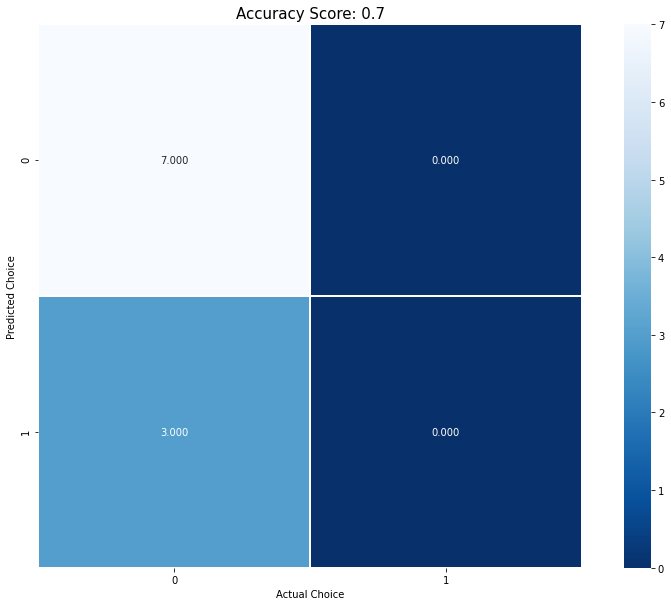

In [13]:
from sklearn import metrics
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = 1, square = True, cmap = 'Blues_r');
# this graph actually plots the confusion matrix
# fmt basically leaves the float's decimal points to 3 sf
plt.ylabel('Predicted Choice');
plt.xlabel('Actual Choice');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

True Positive (TP): Outcome where the model correctly predicts the positive class.

True Negative (TN): Outcome where the model correctly predicts the negative class.

False Positive (FP): An outcome where the model incorrectly predicts the positive class when it is actually negative.

False Negative (FN): An outcome where the model incorrectly predicts the negative class when it is actually positive.

### Accuracy
This is simply equal to the proportion of predictions that the model classified correctly.


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7

In [15]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1., 0.])

### Precision
Precision is also known as positive predictive value. It basically calculates the proportion of positive identifications that were actually correct.

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)

array([0.7, 0. ])

### Recall
Recall (True Positive Rate) is the proportion of actual positives that were identified correctly.

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1., 0.])

### F1 Score
The F1 score is a measure of a test’s accuracy. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of the model.

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average=None)

array([0.82352941, 0.        ])

### Classification report
A summary of all the computed values.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

